### `Finacial News Sentiment Analyzer`

In [17]:
# import the libraries
import pandas as pd
import nltk
import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.naive_bayes import MultinomialNB

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\johnn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:
# load the dataset
df = pd.read_csv(r"C:\Users\johnn\OneDrive\Desktop\finacial statment\all-data.csv", encoding="latin1")
# check
df.head()

,neutral,"According to Gran , the company has no plans to move all production to Russia , although that is where the company is growing ."
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [19]:
# add headers to the dataset
df.columns = ['Sentiment', 'News']
# check the first five rows again
df.head()

,Sentiment,News
0,neutral,Technopolis plans to develop in stages an area...
1,negative,The international electronic industry company ...
2,positive,With the new production plant the company woul...
3,positive,According to the company 's updated strategy f...
4,positive,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...


In [20]:
# check general info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4845 entries, 0 to 4844
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  4845 non-null   object
 1   News       4845 non-null   object
dtypes: object(2)
memory usage: 75.8+ KB


<Axes: xlabel='Sentiment', ylabel='count'>

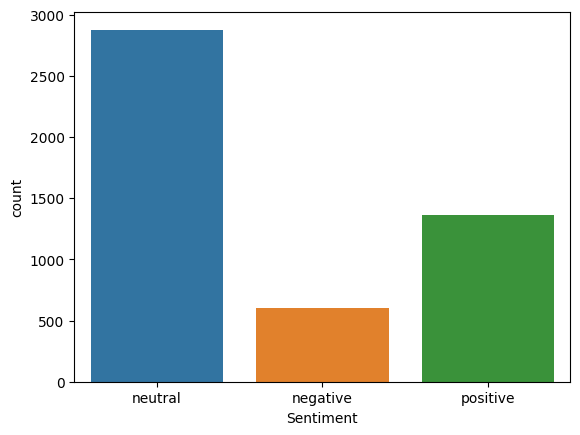

In [21]:
# exploratory data analysis
sns.countplot(x='Sentiment', data=df, hue = 'Sentiment')

In [23]:
# clean the text data
def clean_text(text):
    text = text.lower() # convert to lowercase
    tokens = nltk.word_tokenize(text) # tokenize the text
    tokens = [word for word in tokens if word.isalpha()] # remove punctuation and numbers
    stop_words = set(stopwords.words('english'))
    tokenize = [word for word in tokens if word not in stop_words] # remove stopwords
    return ' '.join(tokens)
# apply the cleaning function to the 'News' column
df['Cleaned_News'] = df['News'].apply(clean_text)

In [24]:
# check the cleaned text
df[['News', 'Cleaned_News']].head()

,News,Cleaned_News
0,Technopolis plans to develop in stages an area...,technopolis plans to develop in stages an area...
1,The international electronic industry company ...,the international electronic industry company ...
2,With the new production plant the company woul...,with the new production plant the company woul...
3,According to the company 's updated strategy f...,according to the company updated strategy for ...
4,FINANCING OF ASPOCOMP 'S GROWTH Aspocomp is ag...,financing of aspocomp growth aspocomp is aggre...
